     0  1  2  3  4  5  6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0    0  0  3  3  3  2  1  2  3  2  ...   3   3   3   0   2   0   2   1   0   
1    0  0  3  3  3  2  1  2  3  2  ...   3   3   3   0   2   0   2   1   0   
2    0  0  3  3  3  2  1  2  3  2  ...   3   3   3   0   2   0   2   1   0   
3    0  0  3  3  3  2  1  2  3  2  ...   3   3   3   0   2   0   2   1   0   
4    0  0  3  3  3  2  1  2  3  2  ...   3   3   3   0   2   0   2   1   0   
..  .. .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
195  1  1  2  0  0  4  0  4  0  3  ...   0   0   0   3   3   3   3   3   1   
196  1  1  2  0  0  4  0  4  0  3  ...   0   0   0   3   3   3   3   3   1   
197  1  1  2  0  0  4  0  4  0  3  ...   0   0   0   3   3   3   3   3   1   
198  1  1  2  0  0  4  0  4  0  3  ...   0   0   0   3   3   3   3   3   1   
199  1  1  2  0  0  4  0  4  0  3  ...   0   0   0   3   3   3   3   3   1   

      id  
0      0  
1      1  
2      2  
3      3  
4      4

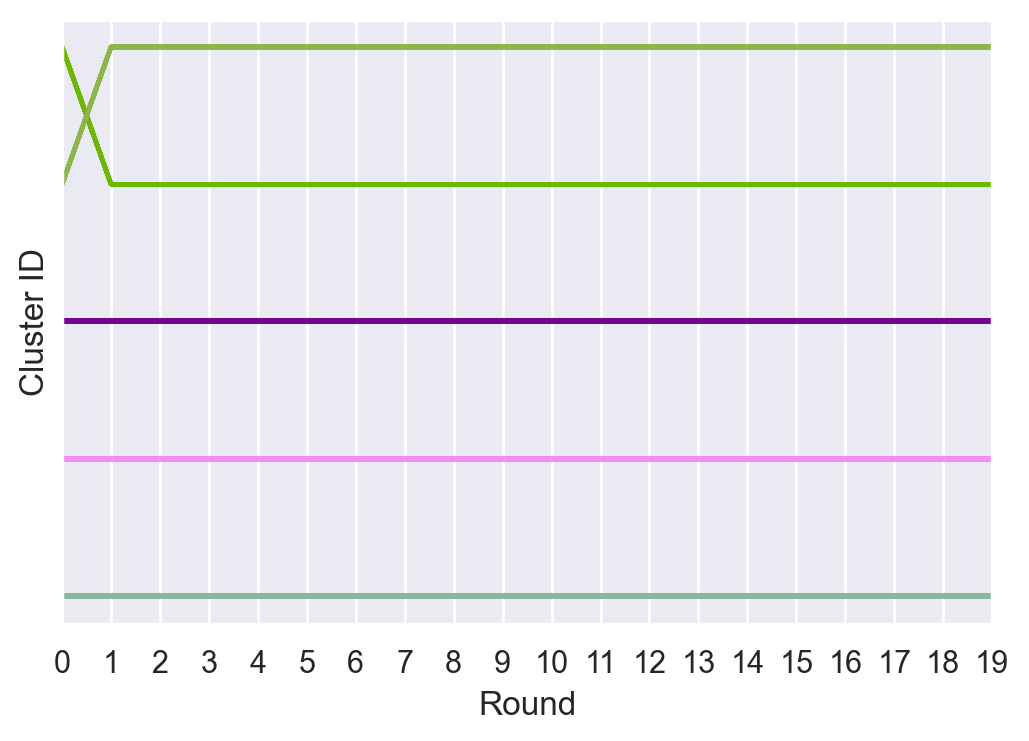

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy as np
import pickle
from pandas.plotting import parallel_coordinates

# i = 'log\WCFL_5_cifar10_dirichlet_0.1_1218_064555_100.pkl'
i = 'log\log_groupwise\WCFL_5_fashion_mnist_5_0.1_dirichlet_40_10_dirichlet_0114_224957_383.pkl'
with open(i, 'rb') as f:
    log = pickle.load(f)
# print(log['clustering'])
df = pd.DataFrame(np.array(log['clustering']).T).iloc[:,:20]
df['id'] = df.index
df['id'] = df['id'].apply(lambda x: str(x))
print(df)
for i in df.index:
    df.iloc[i, 1:] = df.iloc[i,1]

#plot
sns.set_theme(style="darkgrid")
plt.rcParams['figure.dpi'] = 200
fig = parallel_coordinates(df, 'id', axvlines= False)
fig.get_legend().remove()
fig.set_xlabel('Round')
fig.set_yticks([])
fig.set_ylabel('Cluster ID')
# fig.get_yaxis().set_visible(False)
fig.grid()


(10, 840)
pairwise dense output:
 [[1.         0.92400557 0.9329817  0.9195101  0.9385809  0.9418529
  0.9423517  0.9425663  0.92350274 0.9385645 ]
 [0.92400557 0.99999994 0.92267656 0.932853   0.9291798  0.9373963
  0.9348272  0.9493568  0.9947111  0.9417055 ]
 [0.9329817  0.92267656 0.9999999  0.9169963  0.9293734  0.90464675
  0.9322388  0.9609225  0.92870283 0.9479736 ]
 [0.9195101  0.932853   0.9169963  0.9999999  0.9267905  0.91500586
  0.93162805 0.9484898  0.9334487  0.94602764]
 [0.9385809  0.9291798  0.9293734  0.9267905  1.         0.91267097
  0.92419666 0.94410026 0.93242043 0.94020677]
 [0.9418529  0.9373963  0.90464675 0.91500586 0.91267097 1.
  0.9338782  0.93219554 0.9393727  0.92522025]
 [0.9423517  0.9348272  0.9322388  0.93162805 0.92419666 0.9338782
  1.0000001  0.9494659  0.92795193 0.94832206]
 [0.9425663  0.9493568  0.9609225  0.9484898  0.94410026 0.93219554
  0.9494659  1.0000002  0.9552066  0.99465114]
 [0.92350274 0.9947111  0.92870283 0.9334487  0.93242043 

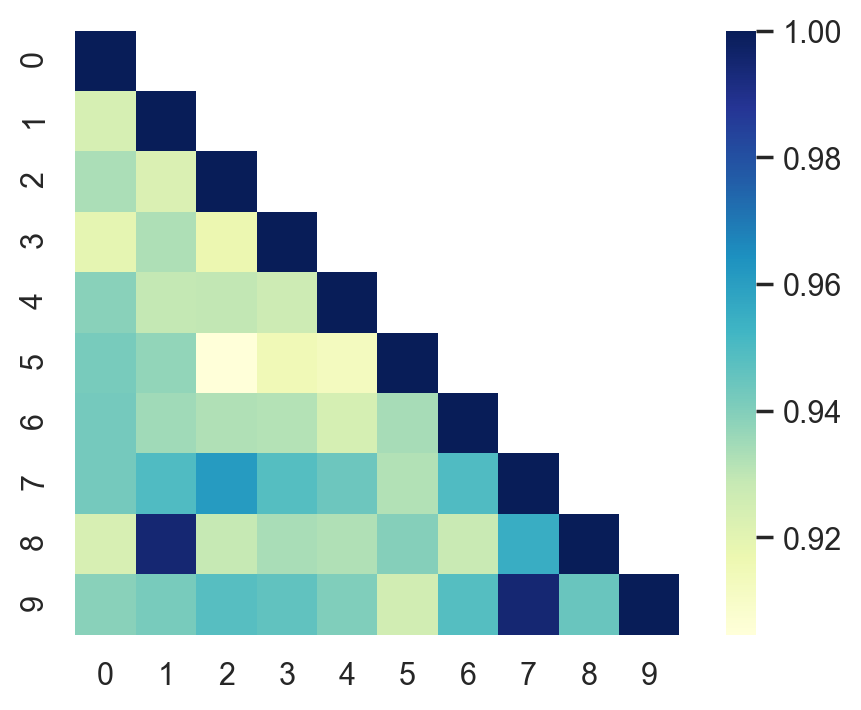

In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics.pairwise import cosine_similarity
# from scipy import sparse


i = 'log\WCFL_10_cifar10_10_0.1_dirichlet_20_10_dirichlet_0126_155127_14.pkl'
with open(i, 'rb') as f:
    log = pickle.load(f)
# print(log['clustering']['center'])
center = np.array(log['clustering']['center'])[-1]
# print(log['clustering']['label'][-1])
# center = np.array(log['clustering']['raw'])[-1]
# center = center[-20:,:]
print(center.shape)


corr = sparse.csr_matrix(center)
corr = cosine_similarity(center)

mask = np.zeros_like(corr)
mask[np.triu_indices(mask.shape[0],1)] = 1
# print(mask)
print('pairwise dense output:\n {}\n'.format(corr))
# print(uniform_data, corr)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,  cmap="YlGnBu")
    plt.show()
